Load Julia packages (libraries) needed  for the snippets in chapter 0

In [1]:
using StatisticalRethinking, CmdStan, StanMCMCChain
gr(size=(500,500));

CmdStan uses a tmp directory to store the output of cmdstan

In [2]:
ProjDir = rel_path("..", "scripts", "04")
cd(ProjDir)

CmdStan uses a tmp directory to store the output of cmdstan

In [3]:
ProjDir = rel_path("..", "scripts", "04")
cd(ProjDir)

In [4]:
howell1 = CSV.read(rel_path("..", "data", "Howell1.csv"), delim=';')
df = convert(DataFrame, howell1);
df2 = filter(row -> row[:age] >= 18, df);
first(df2, 5)

,height,weight,age,male
,Float64⍰,Float64⍰,Float64⍰,Int64⍰
1,151.765,47.8256,63.0,1
2,139.7,36.4858,63.0,0
3,136.525,31.8648,65.0,0
4,156.845,53.0419,41.0,1
5,145.415,41.2769,51.0,0


### Snippet 4.21

Sample 20 random heights

In [5]:
n = size(df2, 1)
selected_ind = sample(1:n, 20, replace=false);
df3 = df2[selected_ind, :];

### Snippet 4.22

Generate approximate probabilities

In [6]:
struct Post
  mu::Float64
  sigma::Float64
  ll:: Float64
  prod::Float64
  prob::Float64
end

mu_list = repeat(range(140, 170, length=200), 200);
sigma_list = repeat(range(4, 20, length=200), inner=200);

ll = zeros(40000);
for i in 1:40000
    d1 = Normal(mu_list[i], sigma_list[i])
    ll[i] = sum(log.(pdf.(d1, df3[:height])))
end

d2 = Normal(178.0, 20.0)
d3 = Uniform(0, 50)
prod = ll + log.(pdf.(d2, mu_list)) + log.(pdf.(d3, sigma_list))
prob = exp.(prod .- maximum(prod))
post = DataFrame(mu=mu_list, sigma=sigma_list, ll=ll, prod=prod, prob=prob)
first(post, 10)

,mu,sigma,ll,prod,prob
,Float64,Float64,Float64,Float64,Float64
1,140.0,4.0,-218.421,-228.052,4.87409e-66
2,140.151,4.0,-215.661,-225.279,7.80703e-65
3,140.302,4.0,-212.93,-222.534,1.21539e-63
4,140.452,4.0,-210.228,-219.817,1.83901e-62
5,140.603,4.0,-207.554,-217.129,2.70451e-61
6,140.754,4.0,-204.908,-214.469,3.86573e-60
7,140.905,4.0,-202.291,-211.837,5.37047e-59
8,141.055,4.0,-199.702,-209.234,7.25154e-58
9,141.206,4.0,-197.141,-206.66,9.51671e-57


Sample post

In [7]:
samples = post[sample(1:size(post, 1), Weights(post[:prob]), 10000, replace=true), :]

,mu,sigma,ll,prod,prob
,Float64,Float64,Float64,Float64,Float64
1,153.266,8.42211,-69.6212,-78.2126,0.578792
2,156.884,9.38693,-70.4015,-78.7855,0.32636
3,158.995,7.45729,-72.4734,-80.7516,0.0456907
4,156.583,5.92965,-71.7671,-80.1672,0.0819703
5,155.226,8.98492,-69.6389,-78.1139,0.6388
6,155.377,9.86935,-70.2765,-78.743,0.340542
7,153.116,9.62814,-70.322,-78.9227,0.284516
8,157.337,7.29648,-70.5098,-78.8702,0.299859
9,153.869,6.17085,-70.4776,-79.0321,0.255032


### Snippet 4.23

Density of sigma

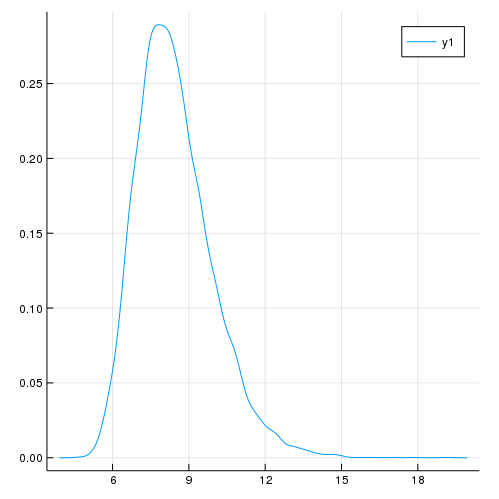

In [8]:
density(samples[:sigma])

End of `clip-21-23.jl`

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*